In [1]:
# Let's first load the data from the provided CSV file and inspect the columns
import pandas as pd
import numpy as np

# Load the data from the uploaded file
file_path = 'churnnotclean.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,ID,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,0,3.67,5.0,4.7,1.10,King's Landing,17/6/2014,iPhone,25/1/2014,15.4,4,True,46.2,0
1,1,8.26,5.0,5.0,1.00,Astapor,5/5/2014,Android,29/1/2014,0.0,0,False,50.0,1
2,2,0.77,5.0,4.3,1.00,Astapor,1/7/2014,iPhone,1/6/2014,0.0,3,False,100.0,0
3,3,2.36,4.9,4.6,1.14,King's Landing,29/6/2014,iPhone,1/10/2014,20.0,9,True,80.0,0
4,4,3.13,4.9,4.4,1.19,Winterfell,15/3/2014,Android,27/1/2014,11.8,14,False,82.4,1


In [2]:
# I need to import the missing library again to complete the process.
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten


In [3]:
# create new variable Duration and Surge_interation
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], errors='coerce')
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')

# calculate Duration
df['Duration'] = (df['last_trip_date'] - df['signup_date']).dt.days

# calculate Surge_interation
df['Surge_interation'] = df['avg_surge'] * df['surge_pct']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15304\1494184677.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15304\1494184677.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')


In [4]:
# separate numerical and categorical columns
numeric_columns = ['avg_rating_by_driver', 'avg_dist', 'avg_surge', 'surge_pct','trips_in_first_30_days', 'weekday_pct']  # 根据实际列名填写数值型列
category_columns = ['city', 'phone', 'luxury_car_user']  # 根据实际列名填写类别型列

# handle missing values by using average imputation 
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 将所有数值列转换为数值类型
    df[column].fillna(df[column].mean(), inplace=True)

# handle missing values in categorical columns by using mode imputation
for column in category_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# perform label encoding on categorical variables( convert strings to numerical values)
label_encoder = LabelEncoder()
for column in category_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [5]:
# select the required feature
df_filtered = df[['avg_rating_by_driver','city', 'phone', 'luxury_car_user', 'surge_pct','churn','avg_dist','weekday_pct','Duration','Surge_interation']]


In [6]:
# # handle missing values
# df_filtered.fillna(method='ffill', inplace=True)

# # encoding categorical variables
# label_encoder = LabelEncoder()
# df_filtered['city'] = label_encoder.fit_transform(df_filtered['city'])
# df_filtered['phone'] = label_encoder.fit_transform(df_filtered['phone'])

In [7]:
# feature matrix X and target vector y
X = df_filtered.drop(columns=['churn'])
y = df_filtered['churn']

# split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# create MLP network model(1)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)


# # create MLP network model，optimize the learning rate and regularization parameters(2)
# mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.01, alpha=0.01, max_iter=500, random_state=42)
# mlp_model.fit(X_train, y_train)

# # # create MLP network model，add layers(3)
# # mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42)
# # mlp_model.fit(X_train, y_train)




# perform model prediction
y_pred_class = mlp_model.predict(X_test)
y_pred_prob = mlp_model.predict_proba(X_test)[:, 1]

# evaluate the model: accuracy, classification,and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred_class)
classification_rep = classification_report(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [9]:
# # Reshape the data into 2D to fit the Conv1D layer (4)
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

# # build a neural network model with convolutional layers
# model = Sequential()
# model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# # perform model prediction
# y_pred_prob = model.predict(X_test).ravel()
# y_pred_class = (y_pred_prob > 0.5).astype(int)


In [10]:
# print evaluation results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\\n', classification_rep)
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.8409
Classification Report:\n               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4720
           1       0.81      0.91      0.86      5280

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

ROC-AUC: 0.9051


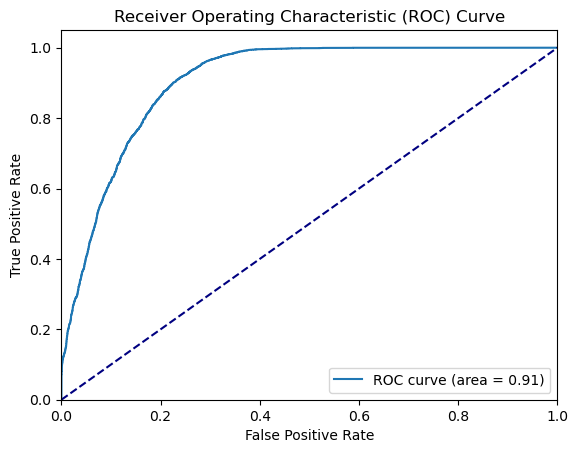

In [11]:
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Accuracy: 0.8590
Test Accuracy: 0.8409
Training ROC-AUC: 0.9276
Test ROC-AUC: 0.9051
The model shows no signs of overfitting.


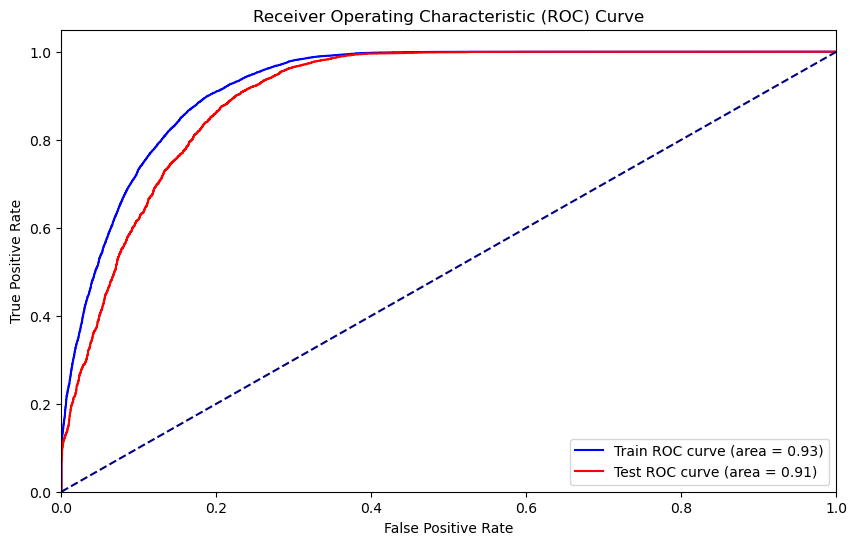

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# prediction of training set
y_train_pred_class = mlp_model.predict(X_train)
y_train_pred_prob = mlp_model.predict_proba(X_train)[:, 1]

# calculate the accuracy of training set and testing set
train_accuracy = accuracy_score(y_train, y_train_pred_class)
test_accuracy = accuracy_score(y_test, y_pred_class)

# print the accuracy of training set and testing set
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# calculate the ROC-AUC of training set
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

# print the ROC-AUC of testing set 
print(f'Training ROC-AUC: {train_roc_auc:.4f}')
print(f'Test ROC-AUC: {roc_auc:.4f}')

# if the accuracy of training set is far more than testing set, the overfitting may have occurred
if train_accuracy - test_accuracy > 0.05:
    print("Warning: The model may be overfitting!")
else:
    print("The model shows no signs of overfitting.")

# plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {train_roc_auc:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
